# Alison's DAT SF 12 Project

Desk is a support ticketing software which my company uses to answer customer questions, issues, feature requests, etc. We are opening an additional support office with the goal of address customers more quickly. The following work will illustrate a rough estimate of how much this office will improve our metrics.

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
pd.set_option('display.max_rows',100)
pd.set_option('display.max_columns',60)

from __future__ import division

%matplotlib inline

Desk has a "Business Insights" tool which offers CSV files of reportint data

In [2]:
# Load the Desk_Business_Insights_Data.csv as a pandas DataFrame 
df = pd.read_csv("Desk_Business_Insights_Data.csv")

In [3]:
df.head()

,Day Count,Date/Time,Created Cases,Resolved Cases,Average Time to First Response,Agent Replies Per Resolve,Average Handle Time,Average Time to Resolution,FCR Rate,Inbound Interactions,Outbound Interactions,Resolved w/o Response,Case Resolves,% Cases Reopened,Case Reopens,Case Deletes,CSat
0,1,Sat 03/21/2015,40,0,NaN,0.0,0:00:00,0:00:00,NaN,54,0,0,0,0.00%,11,0,1.00
1,2,Fri 03/20/2015,204,235,3:58:49,1.6,0:04:21,23:04:34,81.76%,312,264,8,294,62.01%,111,0,0.86
2,3,Thu 03/19/2015,199,257,5:38:41,1.6,0:06:26,17:29:42,67.91%,314,293,11,324,60.80%,121,0,0.95
3,4,Wed 03/18/2015,266,286,5:20:22,1.5,0:06:23,18:27:10,70.89%,432,344,10,398,65.02%,158,0,0.91
4,5,Tue 03/17/2015,241,263,3:21:25,1.4,0:06:28,16:55:52,70.49%,390,295,12,350,82.35%,154,0,0.94


In [4]:
df.columns

Index([u'Day Count', u'Date/Time', u'Created Cases', u'Resolved Cases', u'Average Time to First Response', u'Agent Replies Per Resolve', u'Average Handle Time', u'Average Time to Resolution', u'FCR Rate', u'Inbound Interactions', u'Outbound Interactions', u'Resolved w/o Response', u'Case Resolves', u'% Cases Reopened', u'Case Reopens', u'Case Deletes', u'CSat'], dtype='object')

In [5]:
df = df.rename(columns={'Day Count': 'Day_Count', 'Date/Time': 'Date_Time', 'Created Cases': 'Created_Cases',
                        'Resolved Cases': 'Resolved_Cases','Average Time to First Response': 
                        'Average_Time_to_First_Response'})

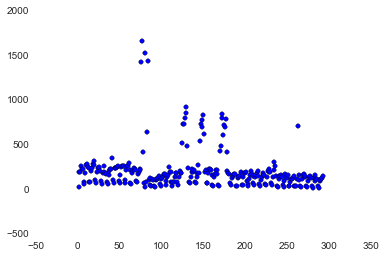

In [6]:
plt.scatter(df.Day_Count, df.Created_Cases)

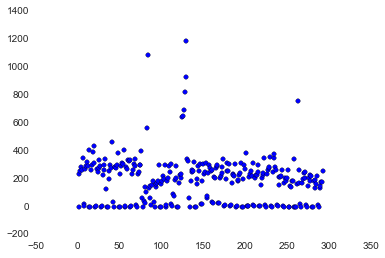

In [7]:
plt.scatter(df.Day_Count, df.Resolved_Cases)

In [8]:
lm = smf.ols('Created_Cases ~ Day_Count', data=df)
fit = lm.fit()
print fit.summary()

                            OLS Regression Results                            
Dep. Variable:          Created_Cases   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     7.457
Date:                Thu, 26 Mar 2015   Prob (F-statistic):            0.00671
Time:                        18:35:03   Log-Likelihood:                -2003.2
No. Observations:                 293   AIC:                             4010.
Df Residuals:                     291   BIC:                             4018.
Df Model:                           1                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    278.5584     26.496     10.513      0.000       226.410   330.707
Day_Count     -0.4266      0.156     -2.731      0.0

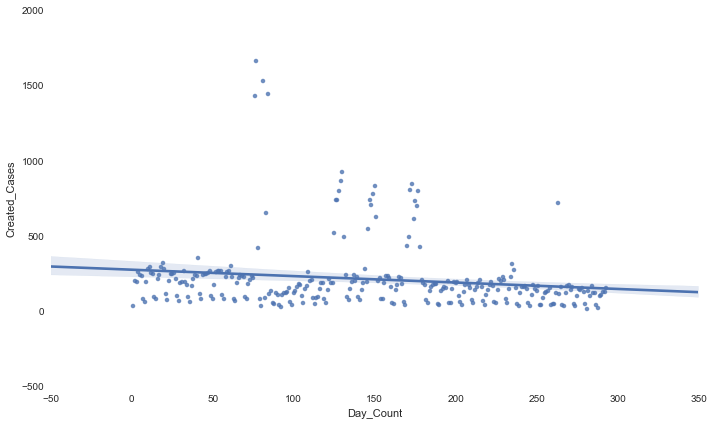

In [9]:
sns.lmplot("Day_Count", "Created_Cases", df, size=6, aspect=5/3);

This is trending downward which is wrong, the number of cases per day since June has increased. I ran other models as well, but they all displayed results that stood in opposition to me (and my teammates) intuition. This is most likely due to outliers and the data being very inconsistent. 

So, I wrote a python script to pull information from Desk's API. The API returns a lot of information:

{u'labels': [], u'updated_at': u'2015-02-01T00:03:37Z', u'locked_until': None, u'received_at': u'2015-02-01T00:03:37Z', u'active_attachments_count': 0, u'id': 176988, u'custom_fields': {u'priority_support': None, u'emailformdropdown': u'Email Integration', u'ticket_groups': None, u'big_team': None}, u'subject': u'This is only a test. A robot test!', u'has_pending_interactions': False, u'changed_at': u'2015-02-01T00:03:37Z', u'priority': 4, u'opened_at': None, u'active_at': None, u'_links': {u'customer': {u'href': u'/api/v2/customers/260038203', u'class': u'customer'}, u'locked_by': None, u'attachments': {u'count': 0, u'href': u'/api/v2/cases/176988/attachments', u'class': u'attachment'}, u'self': {u'href': u'/api/v2/cases/176988', u'class': u'case'}, u'labels': {u'href': u'/api/v2/cases/176988/labels', u'class': u'label'}, u'feedbacks': None, u'case_links': {u'href': u'/api/v2/cases/176988/links', u'class': u'case_link'}, u'notes': {u'count': 0, u'href': u'/api/v2/cases/176988/notes', u'class': u'note'}, u'draft': {u'href': u'/api/v2/cases/176988/replies/draft', u'class': u'reply'}, u'replies': {u'count': 0, u'href': u'/api/v2/cases/176988/replies', u'class': u'reply'}, u'macro_preview': {u'href': u'/api/v2/cases/176988/macros/preview', u'class': u'macro_preview'}, u'message': {u'href': u'/api/v2/cases/176988/message', u'class': u'email'}, u'assigned_user': None, u'assigned_group': {u'href': u'/api/v2/groups/19411', u'class': u'group'}, u'history': {u'href': u'/api/v2/cases/176988/history', u'class': u'history'}}, u'type': u'email', u'blurb': u"From: Krause Robot Test\nCategory: Email Integration\nBrowser: Safari\nOS: Linux\nMessage: We need to setup things that route this out of our queues and metrics - but somewhere where we'll notice if they aren't coming through hourly.\n\n\n", u'status': u'closed', u'first_resolved_at': None, u'description': None, u'label_ids': [], u'active_notes_count': 0, u'resolved_at': None, u'language': None, u'created_at': u'2015-02-01T00:03:37Z', u'has_failed_interactions': False, u'external_id': None, u'first_opened_at': None}

I only needed some of this, but times had to be converted to local time (SF) and I had to clean that data for anomolies like cases which had no created time, no group, etc. 

https://github.com/alharmon13/DAT_SF_12/blob/gh-pages/project/write_desk_data_to_csv.py

In [10]:
data = pd.read_csv("June_6_2014-March_20_2015-Desk_Data.csv")

In [11]:
len(data)

23096

In [12]:
data.head()

,case_id,created_at_date,created_at_time,resolved_at_time,tfr
0,110939,2014-06-01,18:26:16,11:20:23,16.901944
1,110940,2014-06-01,18:39:24,10:29:07,15.828611
2,110941,2014-06-01,19:31:46,10:31:23,14.993611
3,110942,2014-06-01,19:56:20,13:18:35,17.370833
4,110943,2014-06-01,20:18:17,10:48:12,14.498611


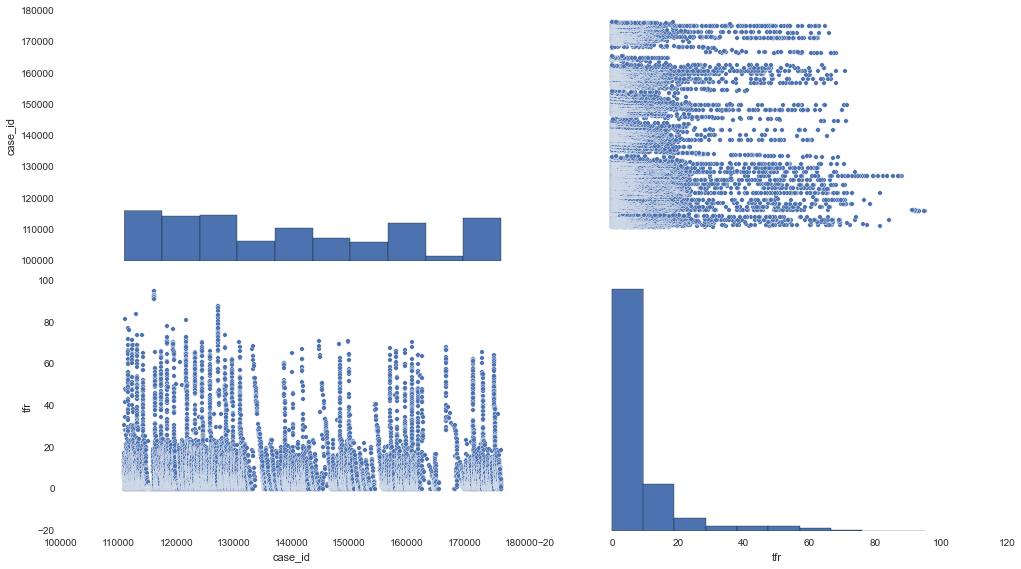

In [13]:
sns.pairplot(data, size = 4, aspect=1.75)

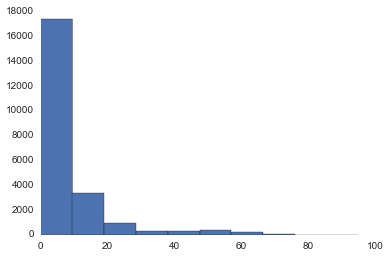

In [14]:
data['tfr'].hist()

Let's look at the same data is last time (number of cases created at per day). 

In [15]:
list_of_dates = []
for x in data['created_at_date']:
    list_of_dates.append(x)

In [16]:
len(list_of_dates)

23096

In [18]:
import itertools

case_day_count = [0]
for (a,b) in itertools.izip(list_of_dates[:-1], list_of_dates[1:]):
    case_day_count.append(case_day_count[-1] + int(a != b))

print len(case_day_count)

23096


In [19]:
data['case_day_count'] = case_day_count

These two lengths match so I added the case_day_count list as a column to the dataframe. 

In [20]:
data.head()

,case_id,created_at_date,created_at_time,resolved_at_time,tfr,case_day_count
0,110939,2014-06-01,18:26:16,11:20:23,16.901944,0
1,110940,2014-06-01,18:39:24,10:29:07,15.828611,0
2,110941,2014-06-01,19:31:46,10:31:23,14.993611,0
3,110942,2014-06-01,19:56:20,13:18:35,17.370833,0
4,110943,2014-06-01,20:18:17,10:48:12,14.498611,0


In [21]:
numbered_list_of_days = data['case_day_count'].unique()

In [22]:
numbered_list_of_days

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

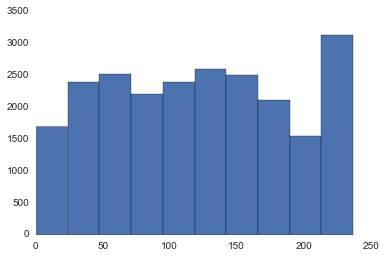

In [23]:
data['case_day_count'].hist()

In [24]:
data['case_day_count'].mean()

# cases per day

121.60919639764461

In [25]:
num_list_of_days = data['case_day_count'].unique()

In [26]:
numbered_list_of_days = num_list_of_days.tolist()

In [27]:
print len(numbered_list_of_days)

238


In [28]:
created_cases_df = data.groupby('case_day_count').count()

In [29]:
created_cases_df.head()

,case_id,created_at_date,created_at_time,resolved_at_time,tfr
case_day_count,,,,,
0,10,10,10,10,10
1,102,102,102,102,102
2,90,90,90,90,90
3,91,91,91,91,91
4,69,69,69,69,69


In [31]:
number_of_cases_per_day = []
for x in numbered_list_of_days: 
    number_of_cases_per_day.append(created_cases_df['case_id'][x])

In [35]:
CASES = zip(numbered_list_of_days, number_of_cases_per_day)
CASES_np = np.asarray(CASES)
col = ('day', 'num_cases')
df_cases = pd.DataFrame(CASES_np, columns=col)
df_cases.head()

,day,num_cases
0,0,10
1,1,102
2,2,90
3,3,91
4,4,69


In [36]:
lm = smf.ols('num_cases ~ day', data=df_cases)
fit = lm.fit()
print fit.summary()

                            OLS Regression Results                            
Dep. Variable:              num_cases   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.162
Date:                Thu, 26 Mar 2015   Prob (F-statistic):              0.282
Time:                        18:38:16   Log-Likelihood:                -1322.2
No. Observations:                 238   AIC:                             2648.
Df Residuals:                     236   BIC:                             2655.
Df Model:                           1                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     89.4674      8.123     11.014      0.000        73.464   105.471
day            0.0639      0.059      1.078      0.2

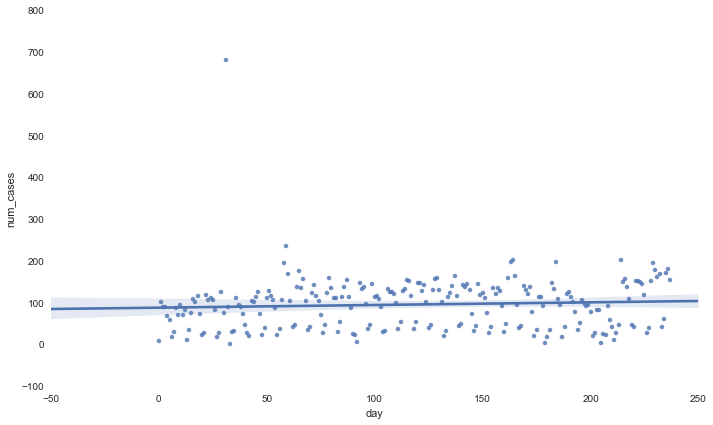

In [37]:
sns.lmplot("day", "num_cases", df_cases, size=6, aspect=5/3);

In [38]:
data['tfr'].mean()

7.9565462995035219

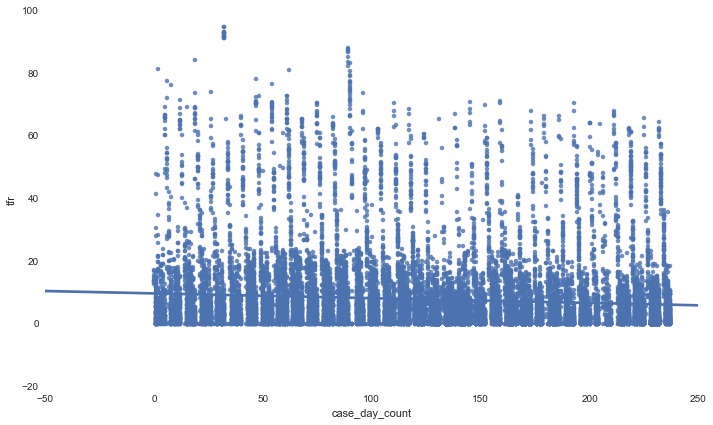

In [39]:
sns.lmplot("case_day_count", "tfr", data, size=6, aspect=5/3);

A linear model doesn't work well with this. The fit looks roughly equivalent to the mean, but doesn't really accurately represent the data. You can see how it's periodic, with weekends being higher. I thought about excluding weekends, but my managers felt like the wait time over a weekend was an important indicator and shouldn't be excluded. 

In [42]:
tfr_df = pd.read_csv("tfr.csv")
tfr_df.head()

,case_id,tfr
0,110939,16:54:07
1,110940,15:49:43
2,110941,14:00:00
3,110942,14:00:00
4,110943,13:00:00


In [43]:
tfr_df.columns

Index([u'case_id', u'tfr'], dtype='object')

Oct
5.3170626994
number of cases created from 7pm-7am: 1177

Nov
6.63891120573
number of cases created from 7pm-7am: 877

Dec
6.30967219817
number of cases created from 7pm-7am: 1326

Jan
6.42531209842
number of cases created from 7pm-7am: 1190

Feb
6.51999527352
number of cases created from 7pm-7am: 1120